# Word2Vec

Word embeddings presented by Tomas Mikolov et al. in 2013 in 2 papers: "Efficient Estimation of Word Representations in Vector Space" and 

They presented 2 models that are called CBOW and Skip-gram. 

In the ***CBOW*** model, the distributed representations of context are used to predict the word in the middle of the window.

$J_\theta = \frac{1}{T}\sum^{T}_{t=1}\log{p}\left(w_{t}\mid{w}_{t-n},\ldots,w_{t-1}, w_{t+1},\ldots,w_{t+n}\right)$

each word ${w}_{i}$ is represented by a vector ${x}_{i}$ of dimension $V$

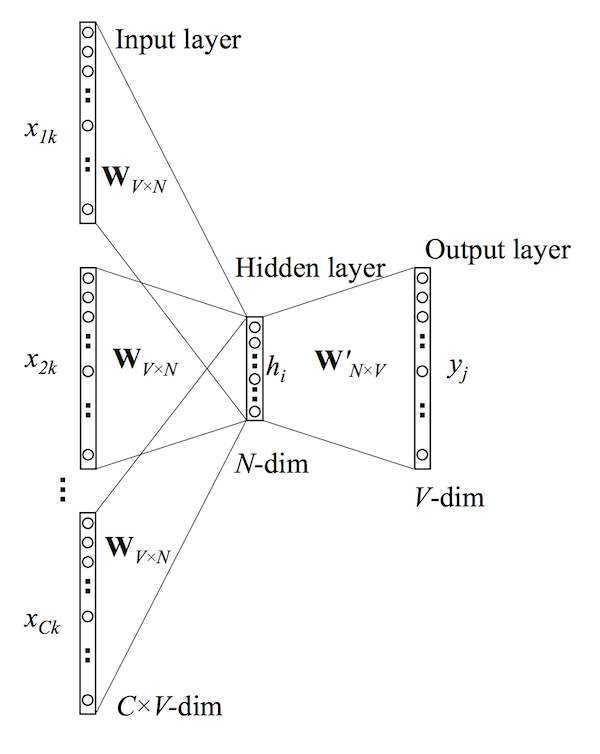

**Skip-gram** 

Skip-gram Word2Vec is an architecture for computing word embeddings. Instead of using surrounding words to predict the center word, as with CBow Word2Vec, Skip-gram Word2Vec uses the central word to predict the surrounding words.

The skip-gram objective function sums the log probabilities of the surrounding n
words to the left and right of the target word $w_{t}$ to produce the following objective:
$J_\theta = \frac{1}{T}\sum^{T}_{t=1}\sum_{-n\leq{j}\leq{n}, \neq{0}}\log{p}\left(w_{j+1}\mid{w_{t}}\right)$

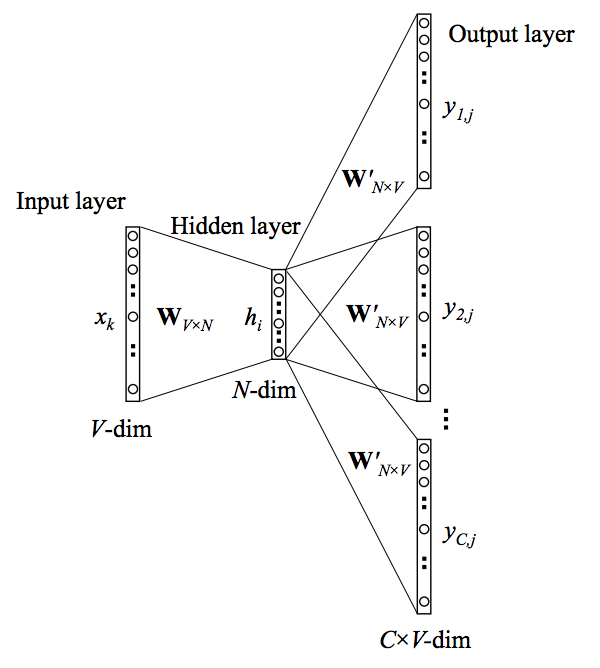

# Gensim

It was implementd by Radim Řehůřek. 

the class word2Vec takes as input the following parameters:

**Parameters**

        sentences (iterable of iterables, optional) – The sentences iterable can be simply a list of lists of tokens, but for larger corpora, consider an iterable that streams the sentences directly from disk/network. See BrownCorpus, Text8Corpus or LineSentence in word2vec module for such examples. See also the tutorial on data streaming in Python. If you don’t supply sentences, the model is left uninitialized – use if you plan to initialize it in some other way.

        corpus_file (str, optional) – Path to a corpus file in LineSentence format. You may use this argument instead of sentences to get performance boost. Only one of sentences or corpus_file arguments need to be passed (or none of them, in that case, the model is left uninitialized).

        vector_size (int, optional) – Dimensionality of the word vectors.

        window (int, optional) – Maximum distance between the current and predicted word within a sentence.

        min_count (int, optional) – Ignores all words with total frequency lower than this.

        workers (int, optional) – Use these many worker threads to train the model (=faster training with multicore machines).

        sg ({0, 1}, optional) – Training algorithm: 1 for skip-gram; otherwise CBOW.

        hs ({0, 1}, optional) – If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.

        seed (int, optional) – Seed for the random number generator. Initial vectors for each word are seeded with a hash of the concatenation of word + str(seed). Note that for a fully deterministically-reproducible run, you must also limit the model to a single worker thread (workers=1), to eliminate ordering jitter from OS thread scheduling. (In Python 3, reproducibility between interpreter launches also requires use of the PYTHONHASHSEED environment variable to control hash randomization).

        max_vocab_size (int, optional) – Limits the RAM during vocabulary building; if there are more unique words than this, then prune the infrequent ones. Every 10 million word types need about 1GB of RAM. Set to None for no limit.


        hashfxn (function, optional) – Hash function to use to randomly initialize weights, for increased training reproducibility.

        epochs (int, optional) – Number of iterations (epochs) over the corpus. (Formerly: iter)


In [1]:
from gensim.models import Word2Vec
import nltk
import csv

In [6]:
path_dir = '../dataset/wiki_clean'
sub_dir = 'AA'
n_id_doc = '00'
with open(f'{path_dir}/{sub_dir}/wiki_{n_id_doc}') as f:
    lines = f.readlines()

from spacy.tokenizer import Tokenizer
from spacy.lang.it import Italian
import re
import spacy
from spacy.tokenizer import Tokenizer
from tqdm import tqdm
nlp = spacy.load("it_core_news_sm")

# Creating a blank Tokenizer with just the English vocab
#tokenizer = Tokenizer(nlp.vocab)
prefix_re = re.compile(r'^[\'[\*("]')
suffix_re = re.compile(r'[\"]\)"$')
infix_re = re.compile(r'''[-'"~)]''')

def custom_tokenizer(nlp):
    return Tokenizer(nlp.vocab, prefix_search=prefix_re.search,
                                suffix_search=suffix_re.search,
                                infix_finditer=infix_re.finditer)

In [7]:
perc_dev = 10/100
num_dev = round(len(lines) * perc_dev)

texts = list()

for line in tqdm(lines[0:-num_dev]):
    if (len(line) > 3) & ( not '<doc' in line):
        doc = nlp(line)
        words = [t.text.lower() for t in doc if t.text not in ['\n']]
        texts.append(words)

100%|██████████| 4756/4756 [00:40<00:00, 117.85it/s]


In [8]:
texts_update = list()
for line in tqdm(lines[-num_dev:-1]):
    if (len(line) > 3) & ( not '<doc' in line):
        doc = nlp(line)
        words = [t.text.lower() for t in doc if t.text not in ['\n']]
        texts_update.append(words)

100%|██████████| 527/527 [00:06<00:00, 86.25it/s] 


In [9]:
from gensim import corpora
# Create dictionary
dictionary = corpora.Dictionary(texts)

print(dictionary.token2id)

{'a': 0, 'organo': 1, 'pompa': 2, '"': 3, '(': 4, ')': 5, ',': 6, '.': 7, 'aria': 8, 'azionare': 9, 'costituito': 10, "d'": 11, 'da': 12, 'di': 13, 'due': 14, 'e': 15, 'i': 16, "l'": 17, 'lorgano': 18, 'mantici': 19, 'manuale': 20, 'o': 21, 'pedali': 22, 'per': 23, 'più': 24, 'serbatoio': 25, 'tastiera': 26, 'tipo': 27, 'un': 28, 'una': 29, 'è': 30, '412.132': 31, 'ad': 32, 'aerofoni': 33, 'ance': 34, 'ancia': 35, 'che': 36, 'classificazione': 37, 'codice': 38, 'delle': 39, 'denominata': 40, 'dovuto': 41, 'esso': 42, 'famiglia': 43, 'hornbostel-sachs': 44, 'il': 45, 'libera': 46, 'nella': 47, 'poiché': 48, 'produce': 49, 'rientra': 50, 'serie': 51, 'suono': 52, ':': 53, 'ci': 54, 'differenti': 55, 'organi': 56, 'sono': 57, 'tipi': 58, 'armonium': 59, 'occidentale': 60, ';': 61, 'americano': 62, 'anche': 63, 'aspirano': 64, 'aspirata': 65, 'atmosferica': 66, 'attraverso': 67, 'camera': 68, 'caso': 69, 'col': 70, 'comprendono': 71, 'compressa': 72, 'del': 73, 'essi': 74, 'facendole': 75,

In [ ]:
# in case we have more documents 

#dictionary.add_documents(texts_2)

In [ ]:
# Save the Dict and Corpus
dictionary.save('mydict.dict')  # save dict to disk
loaded_dict = corpora.Dictionary.load('mydict.dict')

In [10]:
# Creating Word2Vec
model = Word2Vec(
    sentences = texts,
    vector_size = 50,
    window = 10,
    min_count=1,
    workers = 1
)

In [11]:
# display the vector for a given word of the vocabulary
 
model.wv['tecnologico']

array([-8.32596706e-05, -4.73624648e-04, -1.20396568e-02,  1.31508177e-02,
       -2.39159167e-02, -5.44970632e-02,  3.94761637e-02,  4.82666530e-02,
       -1.74250584e-02, -2.99928766e-02, -2.17302181e-02, -5.02751321e-02,
        9.80650261e-03,  1.32981110e-02,  1.75174922e-02,  3.51977162e-02,
        4.71296832e-02, -8.90205801e-03, -4.83774357e-02, -7.03812465e-02,
        1.23138446e-02,  1.87702086e-02,  2.38259230e-02,  2.35061087e-02,
        2.70751026e-02, -8.55953060e-03, -1.17361154e-02,  6.48884289e-03,
       -2.99230497e-02,  2.79175211e-02,  7.97930174e-03, -3.64417806e-02,
       -9.94989183e-03, -1.04913227e-02, -2.31773090e-02,  1.44098578e-02,
        9.58172884e-03,  5.97008551e-03, -1.70487128e-02, -3.13360915e-02,
        3.18248570e-02, -1.90613121e-02, -1.89910252e-02, -1.40609022e-03,
        4.00822610e-02, -1.03959525e-02,  1.05301840e-02, -1.87206939e-02,
        3.18858065e-02,  3.46732326e-02], dtype=float32)

In [42]:
# find the most similar words 

model.wv.most_similar('tecnologico')

[('imposta', 0.9338005185127258),
 ('avente', 0.9294804930686951),
 ('riferita', 0.92805016040802),
 ('sicilia', 0.927909255027771),
 ('posteriore', 0.9276071190834045),
 ('phyla', 0.9275510907173157),
 ('guidato', 0.9265557527542114),
 ('sin', 0.9244712591171265),
 ('femminili', 0.924380898475647),
 ('dipende', 0.9235683083534241)]

In [59]:
# Update the model with new data.

model.build_vocab(texts_update, update=True) # don't forget to instantiate update = True
model.train(texts_update,
            total_examples = model.corpus_count,
            epochs = model.epochs)

(89881, 121705)

**Visualization** 

In [44]:
from itertools import islice
import pandas as pd
import numpy as np

dict_words = dict()
for word_ in islice(model.wv.key_to_index.keys(), 40):
    #print(word_)
    #print(model.wv[word_])
    dict_words[word_] = model.wv[word_]

X = df.to_numpy()
df = pd.DataFrame(dict_words).transpose()

In [52]:
#Computing the correlation matrix
X_corr = df.corr()

#Computing eigen values and eigen vectors
values,vectors = np.linalg.eig(X_corr)

#Sorting the eigen vectors coresponding to eigen values in descending order
args = (-values).argsort()
values = vectors[args]
vectors = vectors[:, args]

#Taking first 2 components which explain maximum variance for projecting
new_vectors = vectors[:,:2]

#Projecting it onto new dimesion with 2 axis
neww_X = np.dot(X,new_vectors)

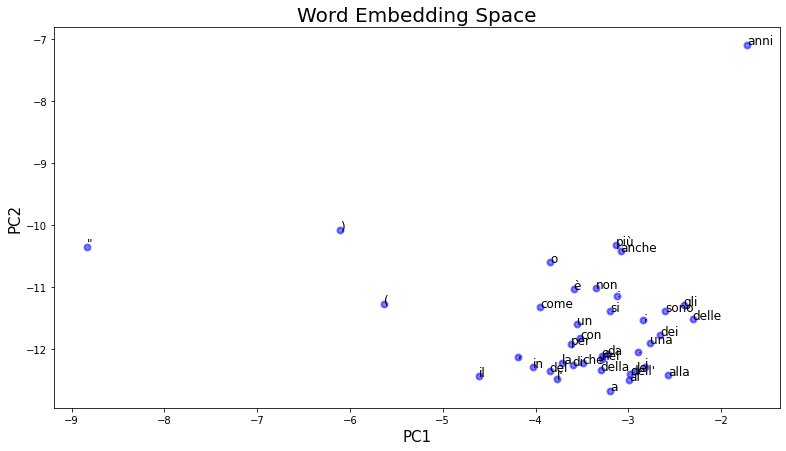

In [61]:
import matplotlib.pyplot as plt
plt.figure(figsize=(13,7))
plt.scatter(neww_X[:,0], neww_X[:,1], linewidths=2, color='blue', alpha = 0.5)
plt.xlabel("PC1",size=15)
plt.ylabel("PC2",size=15)
plt.title("Word Embedding Space",size=20)

for i, word in enumerate(model.wv.key_to_index.keys()):
    plt.annotate(word,xy=(neww_X[i,0],neww_X[i,1]), size=12)
    if i == 39:
        break

 **use pre-trained models** 

pre-trained word embeddings using Wikipedia as copus can be accessed at this link 

https://wikipedia2vec.github.io/wikipedia2vec/pretrained/

# fastText

fastText represents each word as a n-gram of characters. This approach was proposed by Facebook researchers in 2016, by Bojanowski et al. (official implementation can be found here https://fasttext.cc/).
As sake of example, the word, “amore” considering n=3 can be represented as <am, amo, mor, ore, re>, where the '<' '>' brackets indicate the beginning and end of the word.   

This helps capture the meaning of shorter words and allows the embeddings to understand suffixes and prefixes. Once the word has been represented using character n-grams, a skip-gram model is trained to learn the embeddings. This model is considered to be a bag of words model with a sliding window over a word because no internal structure of the word is taken into account. As long as the characters are within this window, the order of the n-grams doesn’t matter.  

fastText works well with rare words. So even if a word wasn’t seen during training, it can be broken down into n-grams to get its embeddings.

Word2vec and GloVe both fail to provide any vector representation for words that are not in the model dictionary.

Fasttext works better in syntactic tasks while word2vec has better performances on semantic tasks.

It is slower to be trained (1.5 times slower compared to word2vec)

parameters:

    vector_size: Dimensionality of vector embeddings to be learnt (Default 100)

    alpha: Initial learning rate (Default 0.025)

    window: Context window size (Default 5)

    min_count: Ignore words with number of occurrences below this (Default 5)

    loss: Training objective. Allowed values: ns, hs, softmax (Default ns)

    sample: Threshold for downsampling higher-frequency words (Default 0.001)

    negative: Number of negative words to sample, for ns (Default 5)

    epochs: Number of epochs (Default 5)

    sorted_vocab: Sort vocab by descending frequency (Default 1)

    threads: Number of threads to use (Default 12)

In addition, fastText has three additional parameters:

    min_n: min length of char ngrams (Default 3)

    max_n: max length of char ngrams (Default 6)

In [1]:
from gensim.models import FastText  
from gensim.test.utils import common_texts

model_FastText = FastText(vector_size=4, window=3, min_count=1)
model_FastText.build_vocab(corpus_iterable=common_texts)
model_FastText.train(corpus_iterable = common_texts, total_examples=len(common_texts), epochs=10)

(36, 290)

In [2]:
import gensim.downloader as api
import fasttext
import fasttext.util

# Download the models
fasttext_model300 = fasttext.load_model('cc.it.300.bin')



In [ ]:
fasttext.util.reduce_model(fasttext_model300, 200)

In [8]:
fasttext_model300.get_word_vector('cocco')

array([ 0.01349157, -0.04294288, -0.05917521, -0.04938002,  0.06403351,
        0.0193373 ,  0.14658223, -0.04111493,  0.01166874, -0.04391709,
       -0.14368121, -0.1109923 ,  0.05751228,  0.00217994,  0.02263357,
       -0.00199993,  0.062889  , -0.07144187, -0.01636926, -0.05715484,
        0.05225616,  0.07782029,  0.05538556,  0.02740067,  0.0215598 ,
        0.02017571, -0.03185485,  0.06629488,  0.07793951, -0.01367362,
        0.03297437, -0.11827774,  0.03856147,  0.01941164, -0.02686567,
        0.03807405,  0.01266214,  0.10283839,  0.1270211 ,  0.03467896,
        0.03288671, -0.05586877,  0.04537806, -0.01301966, -0.04741203,
        0.09879252,  0.10239986,  0.07501598,  0.07993507,  0.01450442,
       -0.0647854 , -0.05474395,  0.14992662, -0.00094277,  0.07095838,
        0.00785731,  0.0095329 , -0.06722686, -0.02438101, -0.07602875,
        0.01564548, -0.00744388, -0.18280217, -0.03274578,  0.0176593 ,
        0.08027427,  0.05697421,  0.05509775, -0.10826263, -0.06

In [9]:
# Get word embeddings
fasttext_model300.get_nearest_neighbors('sfizioso')

[(0.8135901093482971, 'sfiziosissimo'),
 (0.8014639616012573, 'gustoso'),
 (0.745262622833252, 'appetitoso'),
 (0.7240896821022034, 'gustosissimo'),
 (0.7102159857749939, 'stuzzicante'),
 (0.7073103189468384, 'sfiziosa'),
 (0.7065973281860352, 'saporito'),
 (0.6960574984550476, 'stuzzichino'),
 (0.6920152306556702, 'sfiziosamente'),
 (0.6666764616966248, 'delizioso')]

In [31]:
# Bag of words approach 

In [ ]:
my_docs = ["Who let the dogs out?",
           "Who? Who? Who? Who?"]

# Tokenize the docs
tokenized_list = [simple_preprocess(doc) for doc in my_docs]

# Create the Corpus
mydict = corpora.Dictionary()
mycorpus = [mydict.doc2bow(doc, allow_update=True) for doc in tokenized_list]
pprint(mycorpus)